In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_table('http://bit.ly/chiporders')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 216.7+ KB


In [5]:
df.item_price.head()
#df.item_price = pd.Series(df.item_price.str.replace('$', '')                             
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = df['item_price'].str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 216.7+ KB


In [6]:
df['item_price'].head()
#orders.groupby("order_id").agg({'item_price': 'sum'})

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: object

In [7]:
df['item_price'] = df['item_price'].astype(float)

In [8]:
df.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [9]:
g = df.groupby("order_id")[['item_price', 'quantity']].sum()
#g['DQ'] = g['MPF_0-19'] / g['Outstanding_Principal_Balance_at_Time_of_Sale']


In [10]:
g.sort_values(['item_price'], ascending=False).head()

,item_price,quantity
order_id,,
926,205.25,23
1443,160.74,35
1483,139.00,14
691,118.25,11
1786,114.30,20


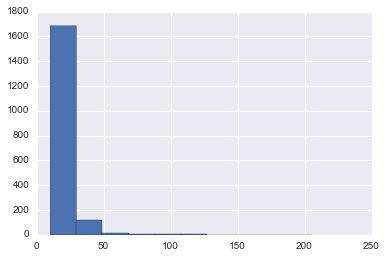

In [11]:
g.item_price.hist()

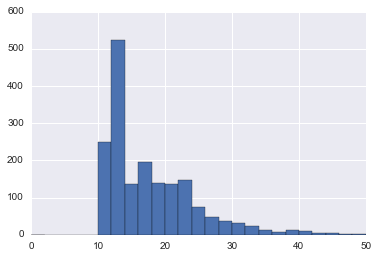

In [12]:
g.item_price.hist(bins = 25, range = (0,50))

In [13]:
g.describe()

,item_price,quantity
count,1834.000000,1834.000000
mean,18.811429,2.711014
std,11.652512,1.677624
min,10.080000,1.000000
25%,12.572500,2.000000
50%,16.200000,2.000000
75%,21.960000,3.000000
max,205.250000,35.000000


In [14]:
g.tail()

,item_price,quantity
order_id,,
1830,23.00,2
1831,12.90,3
1832,13.20,2
1833,23.50,2
1834,28.75,3


In [15]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 1 to 1834
Data columns (total 2 columns):
item_price    1834 non-null float64
quantity      1834 non-null int64
dtypes: float64(1), int64(1)
memory usage: 43.0 KB


In [16]:
f = df.groupby("item_name")[['item_price', 'quantity']].sum()
f.sort_values(['item_price'], ascending=False).head()
#g['DQ'] = g['MPF_0-19'] / g['Outstanding_Principal_Balance_at_Time_of_Sale']

,item_price,quantity
item_name,,
Chicken Bowl,7342.73,761
Chicken Burrito,5575.82,591
Steak Burrito,3851.43,386
Steak Bowl,2260.19,221
Chips and Guacamole,2201.04,506


In [17]:
f.sort_values(['quantity'], ascending=False).head()

,item_price,quantity
item_name,,
Chicken Bowl,7342.73,761
Chicken Burrito,5575.82,591
Chips and Guacamole,2201.04,506
Steak Burrito,3851.43,386
Canned Soft Drink,438.75,351
